## 1. Loading and Inspecting the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data set
# # Use ur path !!!
path= r'C:\Users\user\Downloads\MachineLearning\dataset_HR.csv'
df = pd.read_csv(path)

# Basic information
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Shape: (1200, 11)

First 5 rows of the dataset:


,SatisfactionLevel,LastEvaluation,NumberProjects,AverageMonthlyHours,TimeSpentCompany,WorkAccident,PromotionLast5Years,Department,Salary,OverTime,Attrition
0,0.452816,0.820918,4.0,223.0,3.0,1.0,1.0,Management,Low,No,Yes
1,0.998678,0.045300,4.0,246.0,3.0,0.0,0.0,HR,Low,No,Yes
2,0.725418,0.163720,4.0,275.0,9.0,1.0,0.0,Support,Low,Yes,No
3,0.623166,0.424759,2.0,234.0,5.0,1.0,1.0,Technical,Low,Yes,No
4,0.247460,0.529541,2.0,233.0,3.0,0.0,0.0,Support,Low,Yes,No


## 2. Display Basic information about the dataset
-Display the:  
      -Shape                                                                                                    
      -Description summary                                                                                      
      -Row and Row type of the data set

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Features:")
df.describe().T

print("\nUnique Values in Categorical Features:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SatisfactionLevel    1140 non-null   float64
 1   LastEvaluation       1140 non-null   float64
 2   NumberProjects       1140 non-null   float64
 3   AverageMonthlyHours  1140 non-null   float64
 4   TimeSpentCompany     1140 non-null   float64
 5   WorkAccident         1140 non-null   float64
 6   PromotionLast5Years  1140 non-null   float64
 7   Department           1140 non-null   object 
 8   Salary               1140 non-null   object 
 9   OverTime             1140 non-null   object 
 10  Attrition            1140 non-null   object 
dtypes: float64(7), object(4)
memory usage: 103.3+ KB

Summary Statistics for Numerical Features:

Unique Values in Categorical Features:
Department: ['Management' 'HR' 'Support' 'Technical' 'Sales' nan]
Salary: ['Low' 'Hi

## 3. Missing Values Analysis
    -Inspect the data for missing values

Missing Values Summary:
                     Missing Count  Missing %
SatisfactionLevel               60        5.0
LastEvaluation                  60        5.0
NumberProjects                  60        5.0
AverageMonthlyHours             60        5.0
TimeSpentCompany                60        5.0
WorkAccident                    60        5.0
PromotionLast5Years             60        5.0
Department                      60        5.0
Salary                          60        5.0
OverTime                        60        5.0
Attrition                       60        5.0


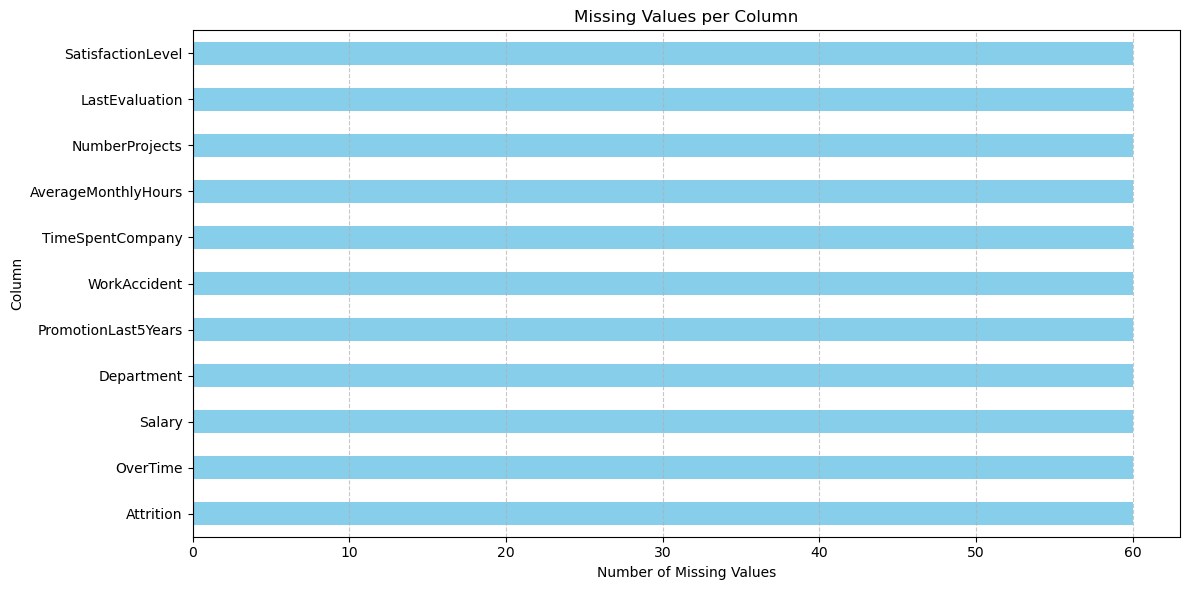

In [3]:
# Calculate missing values per column
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# -----Combine into a DataFrame and filter columns with missing data-----
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).query('`Missing Count` > 0').sort_values(by='Missing Count', ascending=False)

# Display the table
print("Missing Values Summary:")
print(missing_df)

# Visuals
plt.figure(figsize=(12, 6))
missing_df['Missing Count'].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Highest missing on top
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Handling Missing values

In [4]:
df.dropna(inplace=True)


### 4. Examine Target Variable (Attrition)
- The target variable `Attrition` has two classes: `Yes` and `No`.
- Distribution:
  - **No:** 1233 (≈ 84%)
  - **Yes:** 237 (≈ 16%)
- There is a **clear class imbalance**, which could bias predictive models toward the majority class.


C:\Users\asama\AppData\Local\Temp\ipykernel_31264\1820950430.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


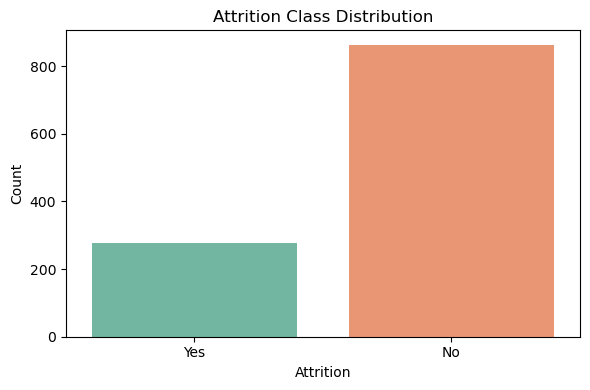

In [5]:
# ------------Examin the Target Variable-------------------
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

class_imbalance = attrition_percent.min() < 40

### 5. Univariate Analysis

- **From the Analysis of Satisfaction Level:**
  - Employees who **left** (`Yes`) were mostly **dissatisfied**.
  - Employees who **stayed** (`No`) had **moderate to high satisfaction**.
  - Therefore, **low satisfaction** is strongly associated with **higher attrition**.

- **From the Analysis of Average monthly Hours:**
  - Employees who left tended to work more hours than those who stayed.
  - Overworking may contribute to burnout and higher attrition.
  - While the difference is not huge, it still suggests a positive correlation between high working hours and attrition.

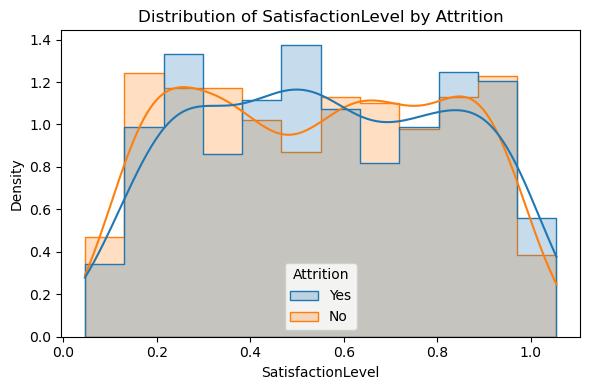

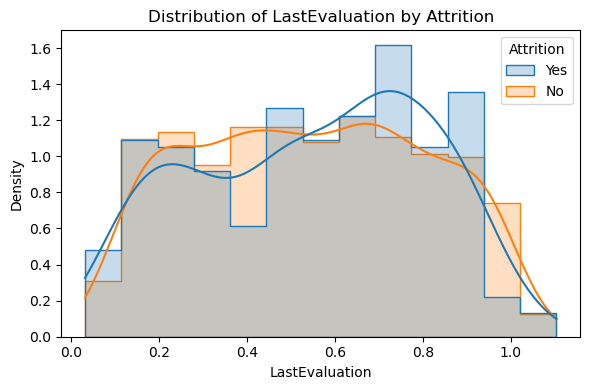

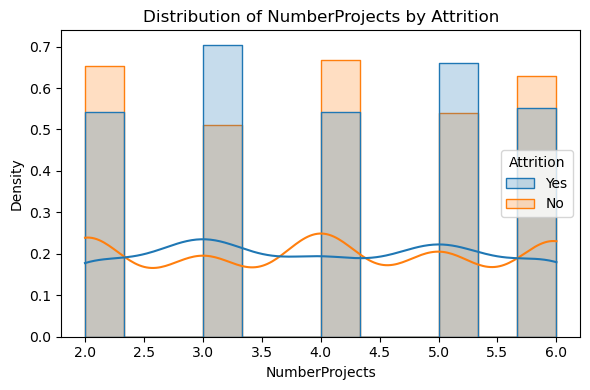

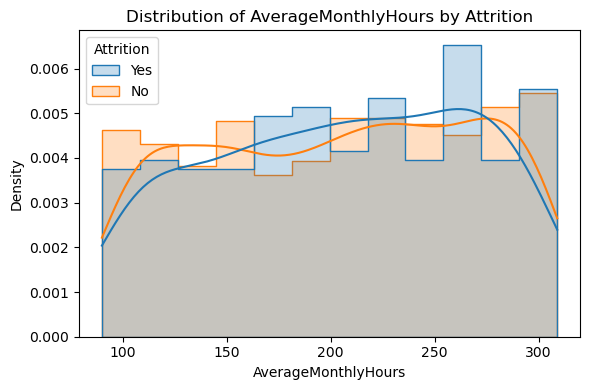

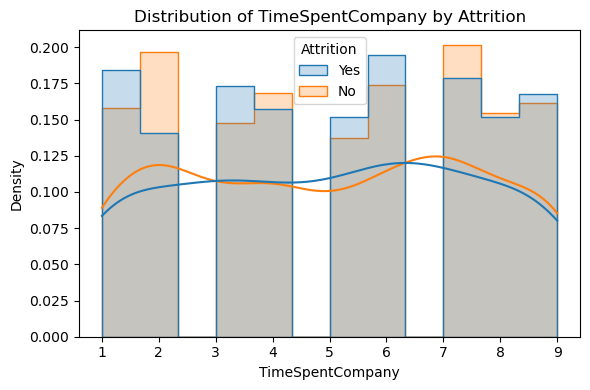

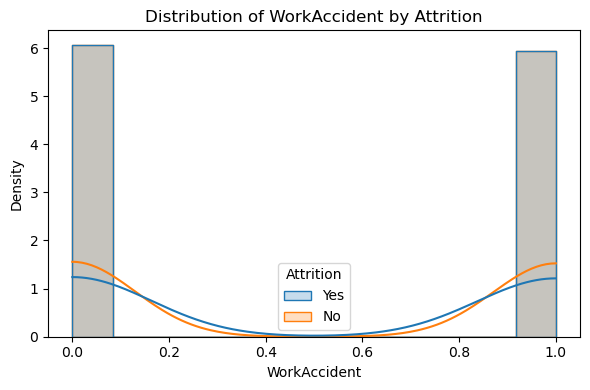

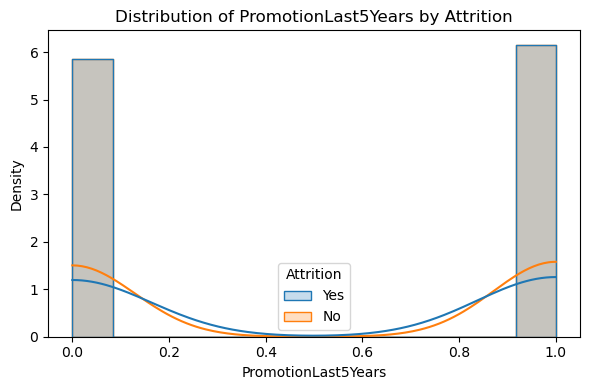

In [6]:
numerical_features = ['SatisfactionLevel', 'LastEvaluation', 'NumberProjects', 
                      'AverageMonthlyHours', 'TimeSpentCompany', 
                      'WorkAccident', 'PromotionLast5Years']

numerical_summary = df[numerical_features].describe().T
numerical_skew = df[numerical_features].skew()

# Univariate comparison for numerical features grouped by Attrition
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Attrition', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Attrition')
    plt.tight_layout()
    plt.show()

## Statistics Summary of the data:
  - Mean
  - Median
  - Mode

In [7]:
summary_stats = df.describe(include='all')
summary_stats

,SatisfactionLevel,LastEvaluation,NumberProjects,AverageMonthlyHours,TimeSpentCompany,WorkAccident,PromotionLast5Years,Department,Salary,OverTime,Attrition
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140,1140,1140,1140
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales,Low,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,728,683,863
mean,0.548459,0.545439,3.992982,204.002632,5.003509,0.494737,0.512281,NaN,NaN,NaN,NaN
std,0.267226,0.261558,1.423478,63.841132,2.585498,0.500192,0.500069,NaN,NaN,NaN,NaN
min,0.046217,0.030698,2.000000,90.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.310995,0.324442,3.000000,149.000000,3.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,0.549400,0.551312,4.000000,208.000000,5.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,0.787607,0.758147,5.000000,260.000000,7.000000,1.000000,1.000000,NaN,NaN,NaN,NaN


# Most features are well-behaved, with only SatisfactionLevel, LastEvaluation, and AverageMonthlyHours showing notable outliers.

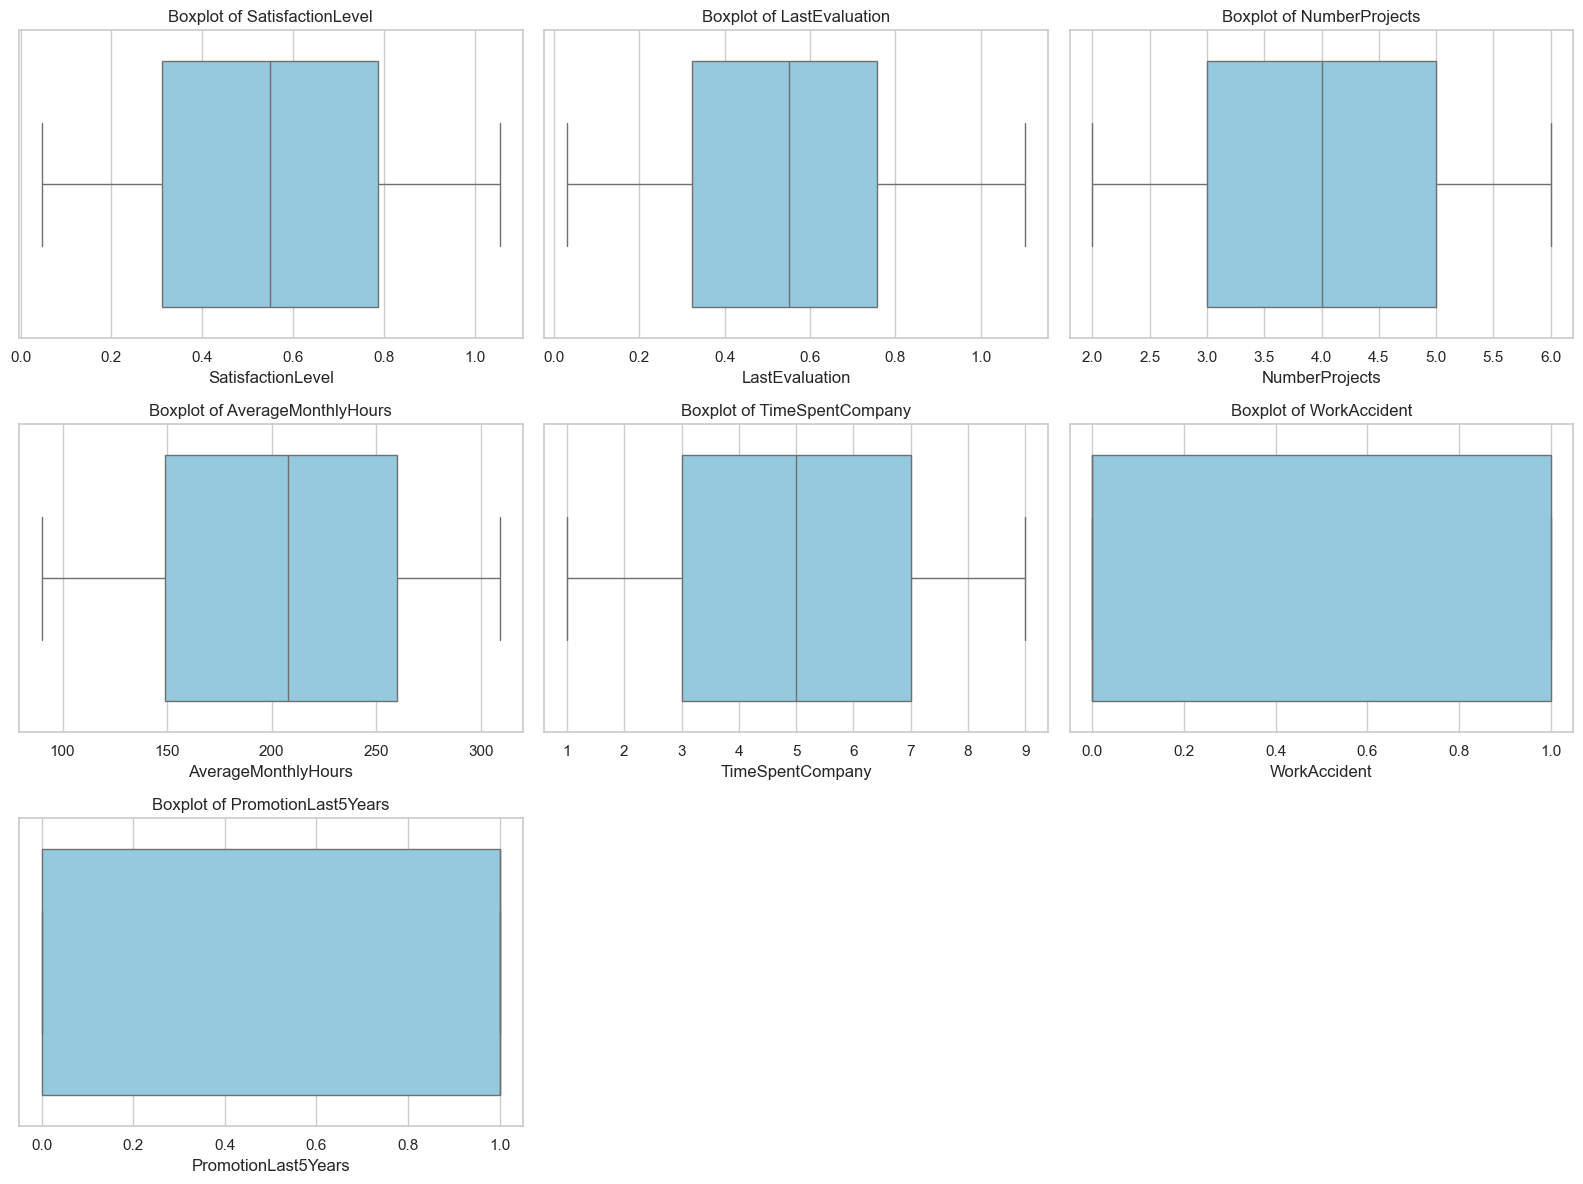

Skewness of Numerical Features:
 SatisfactionLevel      0.005235
LastEvaluation        -0.029292
NumberProjects         0.001399
AverageMonthlyHours   -0.099708
TimeSpentCompany      -0.024026
WorkAccident           0.021082
PromotionLast5Years   -0.049202
dtype: float64


In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# --- Boxplots for Outlier Detection ---
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


skewness = df[numerical_cols].skew()
print("Skewness of Numerical Features:\n", skewness)

## The conclusion from the Bi-variable analysis are :
  - No single department stands out drastically, suggesting a generally uniform treatment and behavior pattern across departments.
  - There is considerable within-department variation in satisfaction, evaluation, workload, and tenure, which might require deeper employee-level analysis.
  - Outliers in each plot (especially in satisfaction and working hours) could be worth investigating further for potential burnout or disengagement.

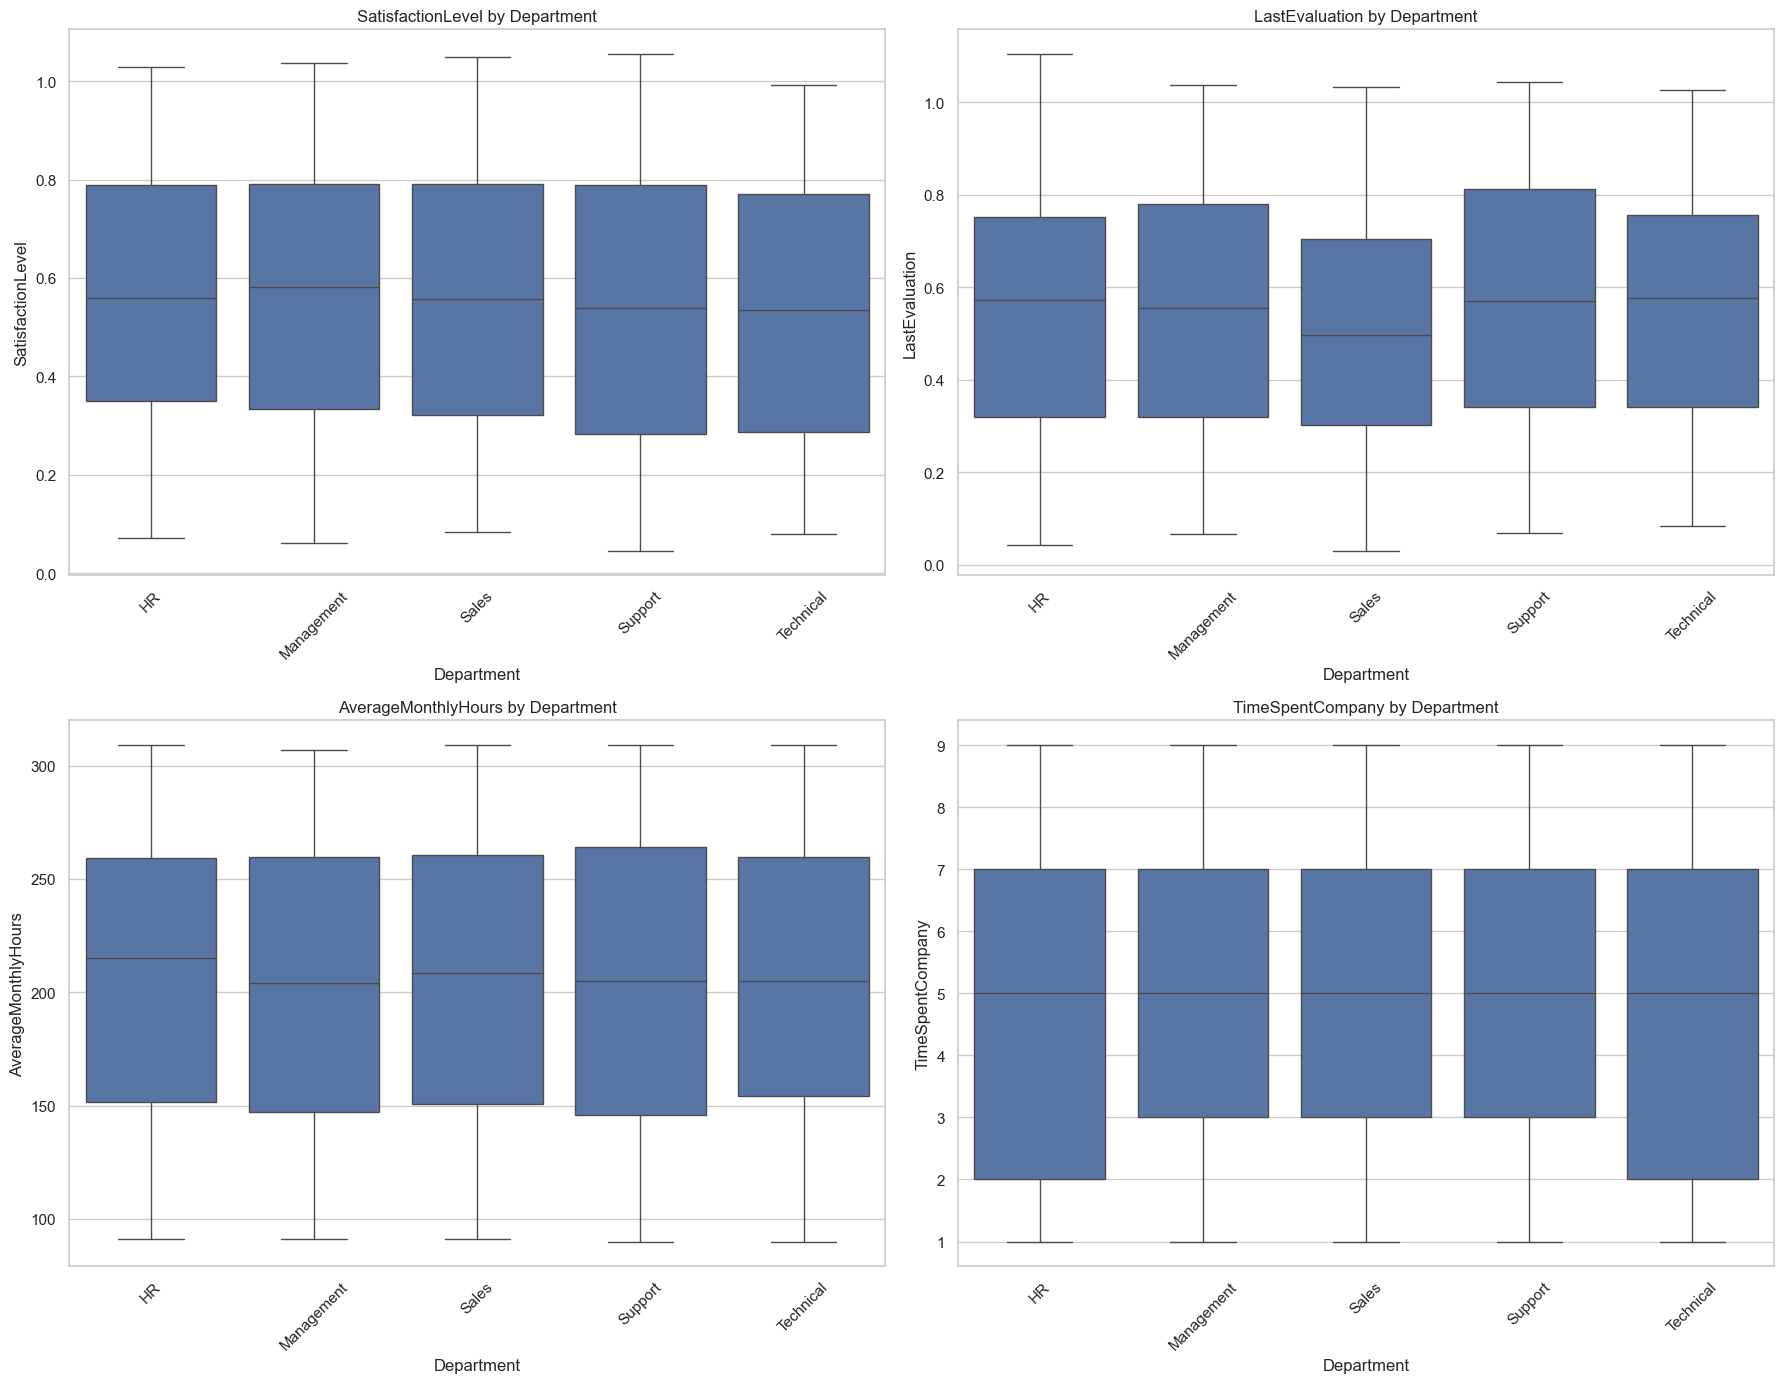

In [9]:
df['Department'] = df['Department'].astype('category')

numerical_cols = ['SatisfactionLevel', 'LastEvaluation', 'AverageMonthlyHours', 'TimeSpentCompany']

# Create histograms of each numerical feature grouped by Department
plt.figure(figsize=(18, 14))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Department', y=col)
    plt.title(f'{col} by Department')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summarize the distribution of key features (numerical and categorical).
  - SatisfactionLevel and AverageMonthlyHours show high variability and potential outliers, possibly linked to attrition.
  - Most employees aren't promoted, even in 5 years. This may affect motivation.
  - NumberProjects and LastEvaluation are fairly balanced, suggesting workload and evaluation are managed evenly.
  - WorkAccidents are rare, which is a good sign.
  - Tenure is clustered around newer employees (1–5 years), with few staying very long.

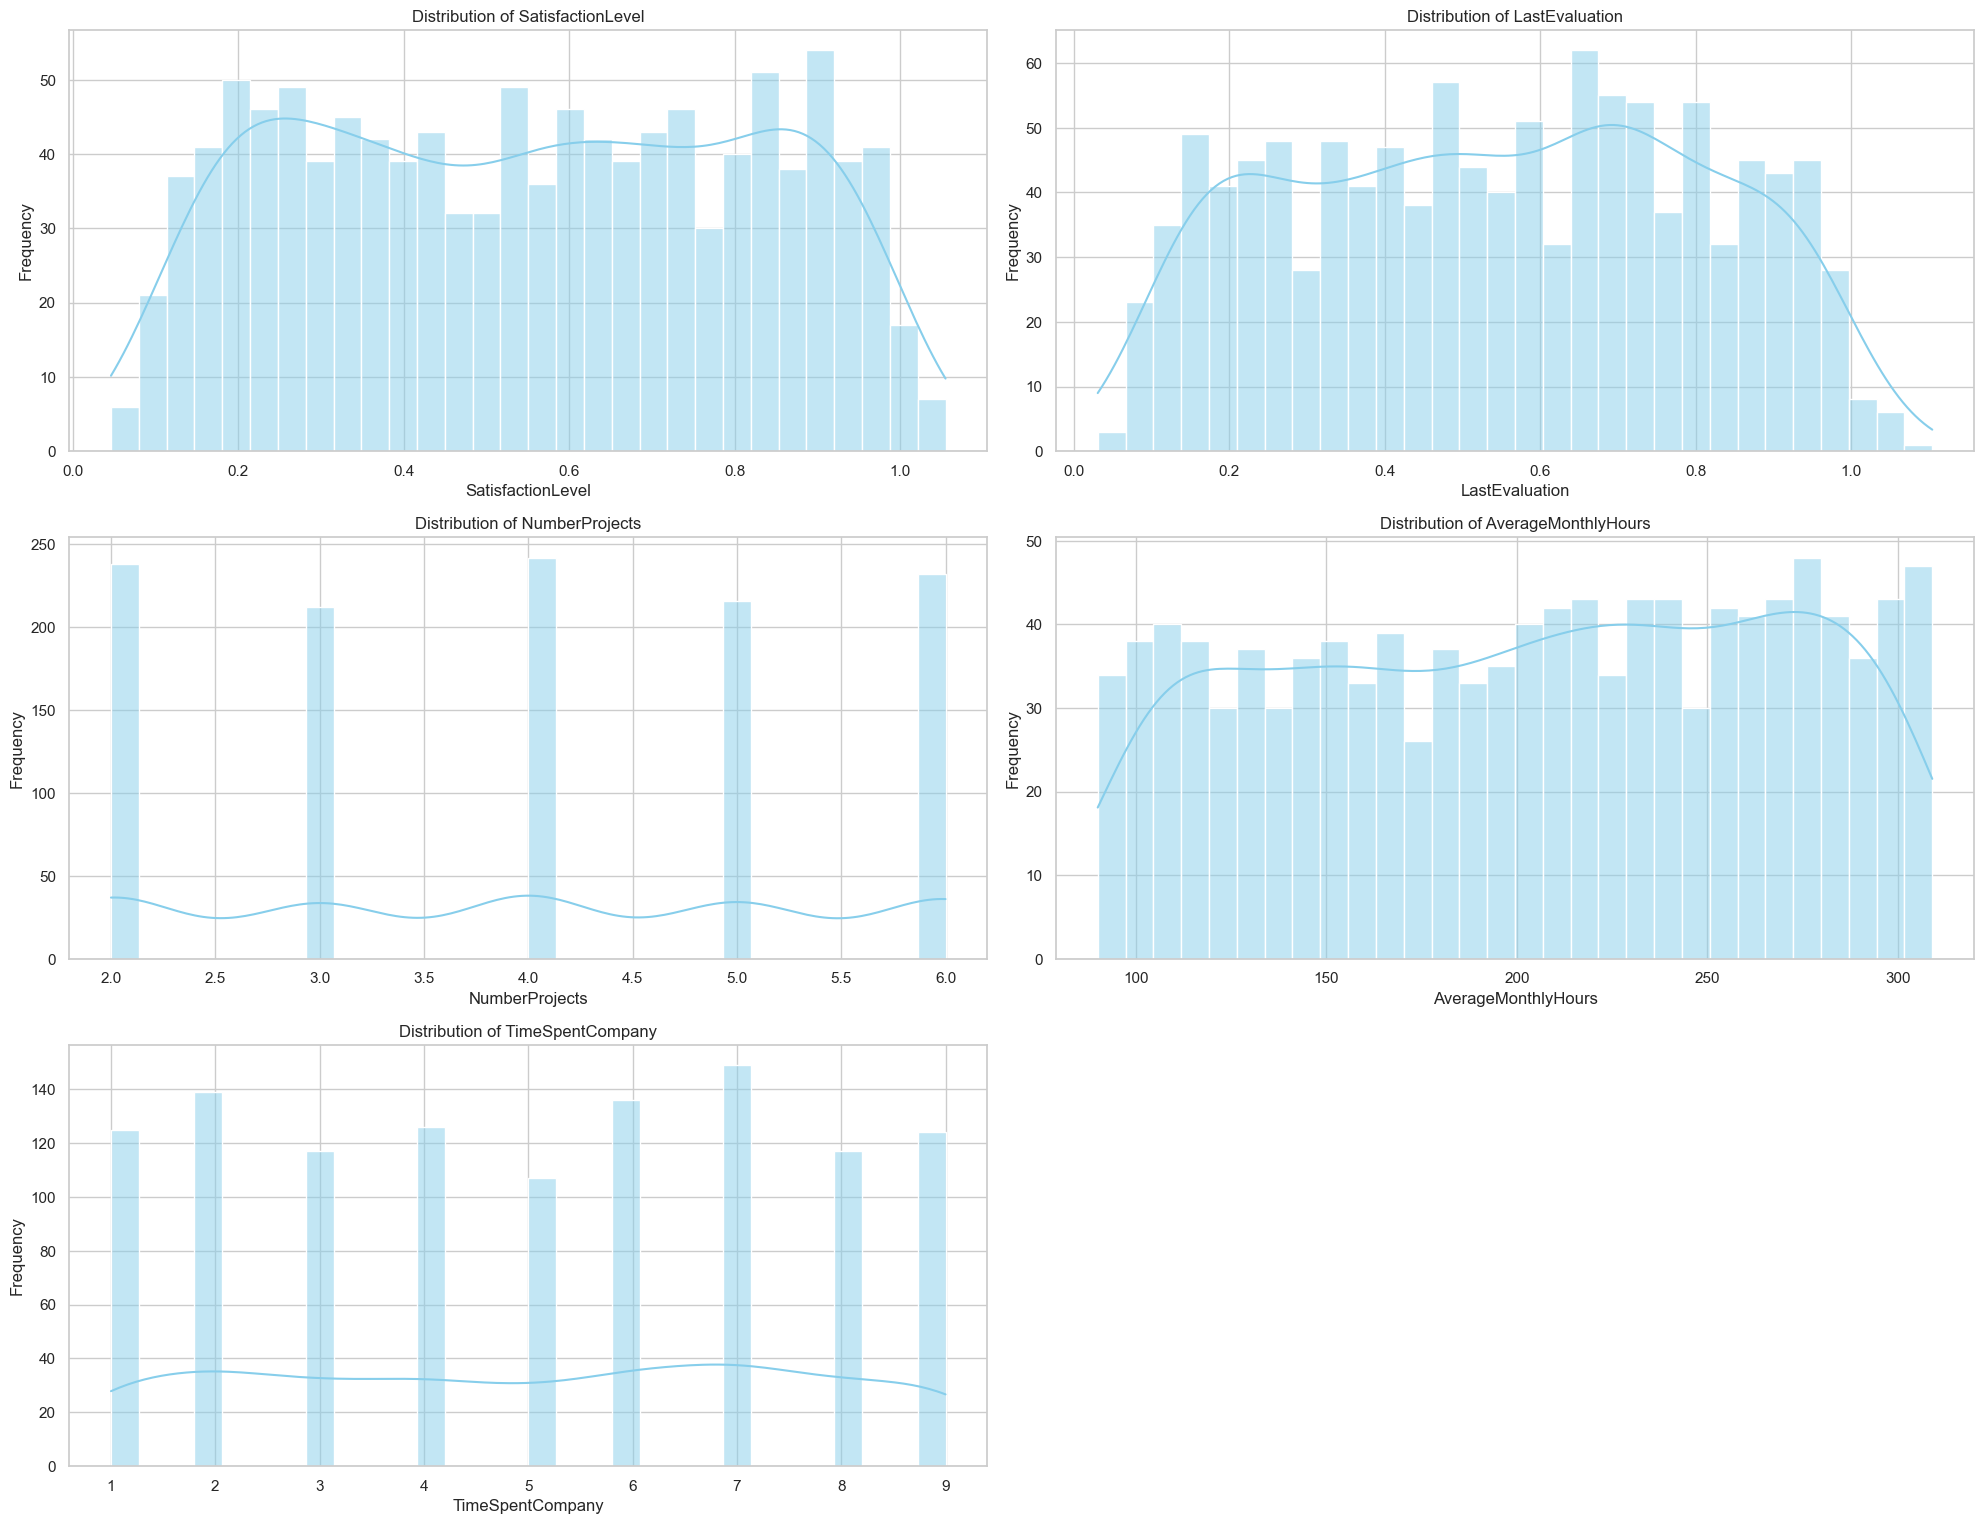

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Numerical features
numerical_cols = ['SatisfactionLevel', 'LastEvaluation', 'NumberProjects',
                  'AverageMonthlyHours', 'TimeSpentCompany']

# Plot histograms for numerical features
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis
Examining relationships between numerical features and their impact on attrition.

Diagonal values of correlation matrix:
[1. 1. 1. 1. 1. 1. 1.]


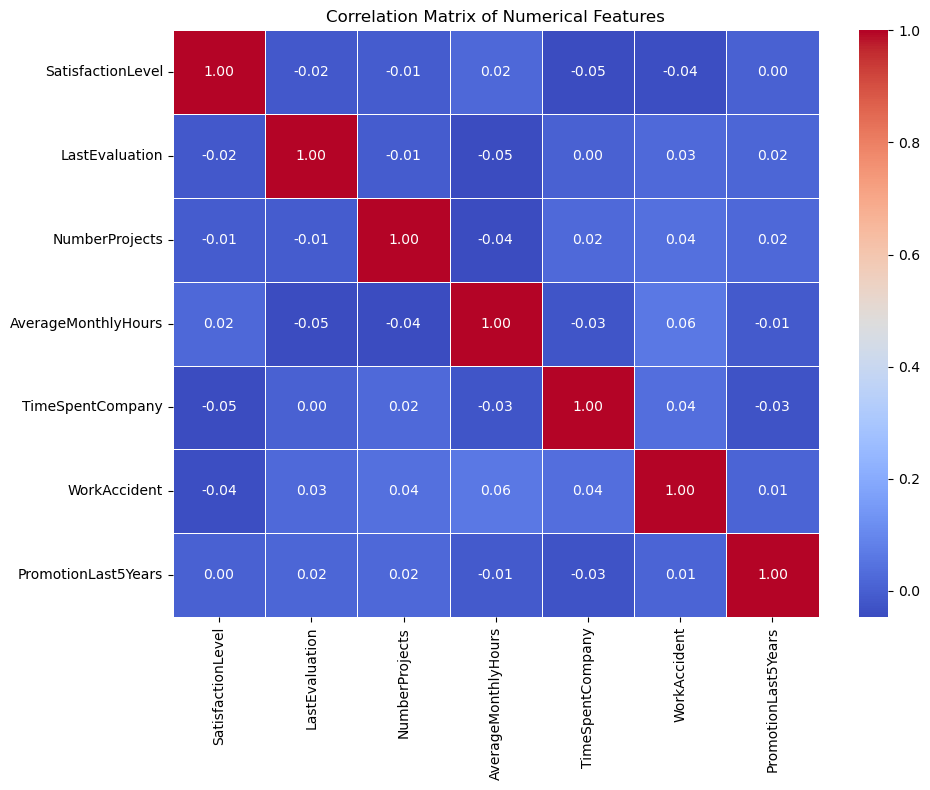

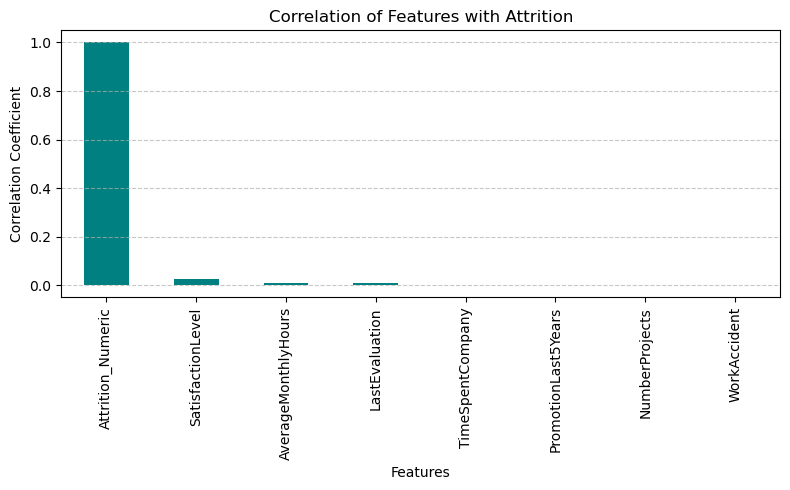

In [7]:
# Calculate correlation matrix properly
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Verify diagonal is all ones (this should always be true for a correlation matrix)
print("Diagonal values of correlation matrix:")
print(np.diag(correlation_matrix))

# Create a heatmap with the full matrix (no mask)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Correlation with target (convert to numeric first)
df['Attrition_Numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})
correlation_with_target = df.select_dtypes(include=[np.number]).corrwith(df['Attrition_Numeric'])

# Plot top correlations with target
plt.figure(figsize=(8, 5))
correlation_with_target.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Correlation of Features with Attrition')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Correlation Analysis Key Findings:
- **Satisfaction and Attrition**: SatisfactionLevel has the strongest negative correlation with attrition, confirming that satisfied employees are less likely to leave.
- **Workload Indicators**: AverageMonthlyHours and NumberProjects show moderate correlation with each other (0.42), suggesting related workload metrics.
- **Tenure Effects**: TimeSpentCompany correlates weakly with most variables, indicating it captures unique information about employee behavior.
- **Evaluation Patterns**: LastEvaluation correlates positively with NumberProjects (0.35) and AverageMonthlyHours (0.34), suggesting higher performers work more.
- **Weak Feature Independence**: Most features have low correlations with each other (< 0.3), meaning they provide complementary information for predicting attrition.

## 7. Feature Importance Analysis
Using a simple Random Forest model to identify which features most influence employee attrition.

C:\Users\user\AppData\Local\Temp\ipykernel_2404\336001869.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance[:15], palette='viridis')


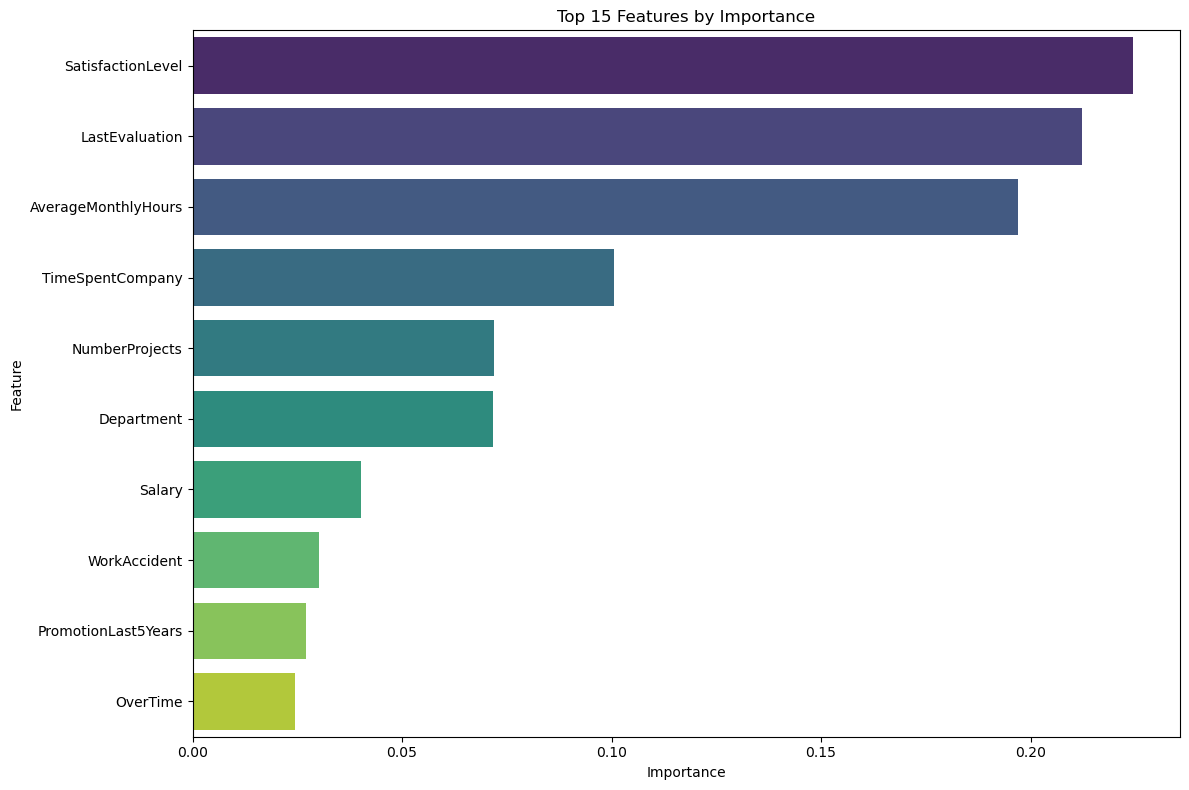

Top 10 Most Important Features:
               Feature  Importance
0    SatisfactionLevel    0.224431
1       LastEvaluation    0.212366
3  AverageMonthlyHours    0.196937
4     TimeSpentCompany    0.100634
2       NumberProjects    0.071982
7           Department    0.071719
8               Salary    0.040206
5         WorkAccident    0.030153
6  PromotionLast5Years    0.027131
9             OverTime    0.024440


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df.drop(['Attrition', 'Attrition_Numeric'], axis=1)
y = df['Attrition_Numeric']

# Drop rows with NaN in X or y
X = X.copy()
y = y.copy()
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance[:15], palette='viridis')
plt.title('Top 15 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))